# Introduction 

## Hi, I'm Phil!

I like math, computers, physics, and long walks on the beach. You can check out what I'm up to at https://www.philipzucker.com/ or give me a twoot at [@SandMouth](https://twitter.com/SandMouth)

I work at Draper Labs where we use Z3 as a backend for tools like the Comparative Binary Analysis (CBAT) project https://github.com/draperlaboratory/cbat_tools which formally verifies binary program transformations.

## Formal Methods 

What are formal methods? Well, let's google it:

"In computer science, specifically software engineering and hardware engineering, formal methods are a particular kind of mathematically based techniques for the specification, development and verification of software and hardware systems.[1] The use of formal methods for software and hardware design is motivated by the expectation that, as in other engineering disciplines, performing appropriate mathematical analysis can contribute to the reliability and robustness of a design.[2]" - https://en.wikipedia.org/wiki/Formal_methods

Broadly speaking, Formal Methods are the application of mathematical thinking to computational systems.

More narrowly, Formal Methods make the connection between specifications and implementations rigid and reliable.

A specification is a precise, clear, and succinct statement of what a program or system should do. It often has a logical or mathematical flavor.

An implementation is also precise, but often significantly more verbose. It needs much more detail to actually describe how the system achieves it's goals. It often has a programming flavor. 

The two should be equivalent in some sense. The process of showing this is verification. This reduces the possibility of bugs in the implementation to bugs in the specification and in this sense a program can be proven correct.  

How do we prove that other than by waving our hands and hoping? Well, it's pretty hard. One astonishingly powerful and versatile tool we'll explore today is the Z3 theorem prover.

## What is Z3?

Well, let's google it.

"Z3 is a state-of-the art theorem prover from Microsoft Research. It can be used to check the satisfiability of logical formulas over one or more theories. Z3 offers a compelling match for software analysis and verification tools, since several common software constructs map directly into supported theories."

### What the heck does that mean?

There are a number of different interesting things you can do with Z3. It has some simplification capabilities that overlap with computer algebra systems like Mathematica, some capabilities that overlap with constraint satisfaction solvers like Minizinc, and a capability to manipulate and express logical statements. The sum total of these capabilities enables z3 to effectively and automatically find solutions to a wide variety of problems or (importantly!) effectively and automatically prove that such solutions _do not exist_.

Z3 was designed with the intention that it is going to be used for hardware and software verification tasks.
Many verification tools extensively use Z3 or equivalent solvers as the heavy lifting. They are often interfaces that translate the task at hand into a bunch of queries to Z3. But Z3 is also useful on it's own.

Z3 was open sourced in the beginning of 2015. The source code is licensed under MIT License and hosted on GitHub.

Z3 has official bindings for C, C++, Python, .NET, OCaml, Java and often bindings available in other languages as well. It also has a command line interface that takes in a standardized logical formula input format called [smtlib](http://smtlib.cs.uiowa.edu/). The python bindings are full featured, and python is a familiar language to many, so that is our choice today.



# Walking through a Z3 problem

To get started, let's do some simple examples

First of you need Z3 installed. Z3 is available on pip, the python package installer. 
Oh, not _that_ Z3. Amusingly, `pip install z3` actually installs a completely unrelated tool.
The command you actually need is


In [ ]:
!pip install z3-solver

We define a simple problem by first importing the library.

In [2]:
from z3 import *

We then declare our variables, state a set of constraints we wish to hold, and then call the convenience function `solve` to get a solution.

In [16]:
x = Int('x')
y = Int('y')
solve(x > 2, y < 10, x + 2*y == 7)

[y = 0, x = 7]


Or we can ask the same question using the longer form syntax of building a solver object and adding constraint

In [15]:
x = Int('x')
y = Int('y')

s = Solver()
s.add(x > 2)
s.add(y < 10)
s.add(x + 2 *y == 7)

print(s.check())
print(s.model())

sat
[y = 0, x = 7]


We can also use z3 to prove properties and theorems. We'll get more into what this means later.

In [17]:
p = Bool("p")
my_true_thm = Implies(p, p)
my_true_thm

Implies(p, p)

In [18]:
prove(my_true_thm)

proved


If the property is not true, z3 can supply a counterexample

In [19]:
q = Bool("q")
my_false_thm = Implies(q, p)
my_false_thm

Implies(q, p)

In [20]:
prove(my_false_thm)

counterexample
[p = False, q = True]


## Z3 Variables

You can create z3 variables of different sorts. Here is an incomplete list

In [ ]:
x = Bool("x")
x = Const("x" , BoolSort())
p, q, r = Bools("p q r") # convenience function for multiple definitions
x = Real("x")
y = Int("x") 
v = BitVec("n", 32) # 32 bit bitvector
f = FP("f", Float64()) #Floating point values
a = Array("a", IntSort(), BoolSort()) # arrays

### Z3 constants

Often values are cast in Z3 expressions for you automatically, but sometimes they aren't. You can explicitly cast constants when this is the case.

In [ ]:
print(BoolVal(True))
print(RealVal(2.5))
print(IntVal(7))
print(Q(1,3))

## Constraints / operations

Operations and constraints in Z3 are built mostly by overloading the ordinary python operations. There is a good chance you can guess what the right operator is. All operations are also available as capitalized functions.

In [ ]:
# Common numerical operations
print(x + x) # addition
print(x * x) # multiplication
print(x ** 4) # fourth power of x 

# Common boolean operations
print(And(p,q))
print(And(p,q,r)) # some can accept more than one argument for convenience.
print(Or(p,q))
print(Implies(p,q))
print(Xor(p,q))
print(Not(p))

# Constraints 
print(x == x) #equal
print(x != x) # not equal
print(x <= RealVal(3)) # inequality
print(Or( x < 3,  x == 3, x > 3  )) # Constraints are operations into booleans

# And many more! Look in the API docs for others https://z3prover.github.io/api/html/namespacez3py.html

Now that we've shown some of the basics, you're ready to try something simple on your own

### Exercise 1
Get a root of the polynomial `x**3 + 3*x**2 + 4*x + 2 == 0` using z3. Can you use z3 to show this is the only solution?

In [ ]:
# Let's take a look
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(-3,3,200)
plt.plot(xs,xs**3 + 3*xs**2 + 4*xs + 2)
plt.show()

In [ ]:
# FILL IN


### * General purpose python exploration tricks

I find it extremely useful to explore libraries interatively in python. It is often faster and more honest than looking up the documenation.

In [ ]:
p = Real("p") # Define the z3 expression of Real constant value 3.
type(p) # What is the type of this thing
help(p) # What is the documentation. z3 has quite lovely documentation actually.
dir(p) # Does this thing have any suspicious looking functions?

### * Getting Values out of Z3 models

Z3 has a number of helper functions like `solve` above, but a more powerful interface is through the Solver class

In [ ]:
x = Int("x")
y = Real("y")
z = Real("z")
p = Bool("p")
a = BitVec("a",32)

s = Solver()
s.add(x == 2)
s.add(y == 1/3)
s.add(p == True)
s.add(a == 0xDEADBEEF)
print(s.check())
m = s.model()

print(m[x].as_long())
print(m[y].numerator_as_long() / m[y].denominator_as_long())
print(m[a].as_long())
print(bool(m[p]))

m.eval(2*x + 1) # you can also evaluate z3 expressions in the context of the model
      
s = Solver()     
s.add(z ** 2 == 2)
print(s.check())
m = s.model()
print(m[z].approx())
print(m[z].approx().numerator_as_long() / m[z].approx().denominator_as_long())

### * Conversion Functions

It is useful to sometimes convert between sorts. There are conversion functions for that for many different sorts. Here is a simple example.

In [ ]:
x = Int("x")
y = Real("y")
ToReal(x)
ToInt(y)

## * Simplifying expressions with z3

Z3 can be used to simplify expressions similar to how one might use sympy or mathematica.

In [ ]:
x = Int('x')
y = Int('y')
print(simplify(x + y + 2*x + 3))
print(simplify(x < y + x + 2))
print(simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5))) 

### * Fresh Variable Names
It can be useful to generate variables with fresh names, especially when building problems programmatically. Z3 has built in functionality for this.

In [ ]:
print(FreshReal(prefix="x"))
print(FreshBool(prefix="b"))
print(FreshConst(IntSort() , prefix="f"))

### Useful Documentation

Now that we have a simple example, let's look at where we can go to find out more

- The API docs: https://z3prover.github.io/api/html/namespacez3py.html
- https://rise4fun.com/z3/tutorial has an interactive tutorial in z3. It uses the smt-lib2 input language, not python
- https://ericpony.github.io/z3py-tutorial/guide-examples.htm A tutorial for the python bindings upon which this tutorial is heavily based



# Using Z3 To Find Stuff

Z3 is from one perspective just executing a flexible and fast search similar to constraint satisfaction solvers, SAT solvers, and computer algebra systems. You can use Z3 to solve puzzles like Sudoku and Nonograms. 
It isn't just fun and games, there are many practical usages of such things (it's a whole industry).
 - Graph Coloring (Useful for register allocation for example)
 - Scheduling Problems
 - Routing problems
 - etc.


## 8 Queens

The eight queens puzzle is the problem of placing eight chess queens on an 8x8 chessboard so that no two queens attack each other. Thus, a solution requires that no two queens share the same row, column, or diagonal.

In [21]:
# We know each queen must be in a different row.
# So, we represent each queen by a single integer: the column position
Q = [ Int(f"Q_{row + 1}") for row in range(8) ]

# Each queen is in a column {1, ... 8 }
val_c = [ And(1 <= Q[row], Q[row] <= 8) for row in range(8) ]

# At most one queen per column
col_c = [ Distinct(Q) ]

# Diagonal constraint
diag_c = [ If(i == j,
              True,
              And(Q[i] - Q[j] != i - j, Q[i] - Q[j] != j - i))
           for i in range(8) for j in range(i) ]

solve(val_c + col_c + diag_c)

[Q_5 = 8,
 Q_8 = 6,
 Q_3 = 2,
 Q_2 = 7,
 Q_6 = 1,
 Q_4 = 4,
 Q_7 = 3,
 Q_1 = 5]


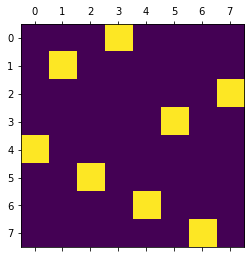

In [22]:
import numpy as np
import matplotlib.pyplot as plt

s = Solver()
s.add(val_c + col_c + diag_c)
s.check()
m = s.model()
board = np.zeros((8,8))

for i in range(8):
    board[i, m[Q[i]].as_long() - 1] = 1

plt.matshow(board)

## Exercise: Send More Money

There is an assignment of unique digits to letters such that the equation `send + more = money` holds. Find an assignment of the digits to make this true.

Here we show the longer form interface to the Solver as compared to the `solve` convenience method used above.

In [7]:
digits = Ints('s e n d m o r y')
s,e,n,d,m,o,r,y = digits
send = Sum([10**(3-i) * d for i,d in enumerate([s,e,n,d])]) # convert digits of number to number
more = Sum([10**(3-i) * d for i,d in enumerate([m,o,r,e])])
money = Sum([10**(4-i) * d for i,d in enumerate([m,o,n,e,y])])

solver = Solver()
solver.add([s > 0, m > 0]) # first digits are nonzero

# Constrain all digits constrained to be 0 through 9
# FILL IN

# Constrain all digits to be unique (Hint: Look at the 8-Queens constraints. Anything useful?)
# FILL IN

# Constrain send + more == money
# FILL IN

solver.check()
solver.model()

[m = 1, s = 1]

## * Robot Arm Inverse Kinematics

The inverse kinematics problem is to find the angles of the joints of a robot arm in order to place the hand in some position. 
You can describe the joint positions using polynomial constraints. Pairs of joints are constrained to be a distance apart equal the the length of that piece of the robot arm. You can also enter inequality constraints (like staying out of the floor) with varying amounts of success.

In [ ]:
pos = np.array([  [ Real(f"x_{(i,j)}")  for j in range(2)] for i in range(3)])
s = Solver()
s.add( np.sum(pos[0]**2) == 1 )
s.add( np.sum(pos[1]**2) == 1 )
s.add( np.sum((pos[2] - pos[0])**2) == 1 )
s.add( np.sum((pos[2] - pos[1])**2) == 1 )
s.add( pos[2][0] == 0 )
s.add( pos[2][1] == 1 )
s.check()
s.model()


## * Discrete Tomography

Tomographic reconstruction is an interesting class of problems. One example is x-ray tomography. The data you get out is the integrated extinction of an x-ray along a line going thorugh a patient. From the data of many such lines, one can attempt to back out an image of the x-ray absorption through out the patient. 
A simplified schematic version of this can be done in a discrete setting. We have a binary image and can collect the sums of horizontal, verticals, and diagonals. Then we ask z3 to find an assignment that satisfies these sum constraints. There may or may not be a unique solution.
The problem is related to Picross/Nonograms puzzles.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
bin_img = np.array([
[0,0,0,0,0,0,0],
[0,0,1,0,1,0,0],
[0,0,1,0,1,0,0],
[0,0,0,0,0,0,0],
[0,1,0,0,0,1,0],
[0,0,1,1,1,0,0],
[0,0,0,0,0,0,0]])
bin_img = np.hstack([bin_img,bin_img.T])
bin_img = np.vstack([bin_img,bin_img])
plt.imshow(bin_img)
plt.title("Original Image")


In [ ]:
rows, cols = bin_img.shape
bvars = [[ If(Bool(f"x_({row},{col})"), IntVal(1),IntVal(0)) for col in range(cols)] for row in range(rows)]

s = SolverFor("QF_FD")
# for each row, column sum constraint
s.add([Sum(bvars[row]) == IntVal(int(np.sum(bin_img[row,:]))) for row in range(rows)]) 
# for each column, row sum constraint
s.add([Sum([bvars[row][col] for row in range(rows)]  ) == IntVal(int(np.sum(bin_img[:,col]))) for col in range(cols)])

# diagonal sum constraints
for diag in range(rows+cols): # Challenge mode: Can you do this more elegantly and clearly? 
    s.add(Sum([ bvars[row][col] for row in range(rows) for col in range(cols) if col + row == diag]) == IntVal(int(sum([ bin_img[row,col] for row in range(rows) for col in range(cols) if col + row == diag]))))
    s.add(Sum([ bvars[row][col] for row in range(rows) for col in range(cols) if col - row == diag - rows +1]) == IntVal(int(sum([ bin_img[row,col] for row in range(rows) for col in range(cols) if col - row == diag - rows + 1]))))
for i in range(50):  # loop through all solutions
    res = s.check()
    if res == sat:
        m = s.model()
        sol = [[m.eval(s).as_long() for s in row] for row in bvars]
        plt.figure()
        plt.imshow(sol)
        plt.title("Reconstructed Image")
        s.add(Not(And([  And([v == m.eval(v) for v in row]) for row in bvars])))
    else:
        print("No more models")

# Interlude: A Rough Sketch of How Z3 works

It is very useful to have at least a simplistic mental model of how a tool works, so that you can predict the places where it might run into difficulty, or formulate your problem in a way amenable to the solver.

Z3 (and other related SMT solvers) are built around the core concept of a SAT solver, so let's discuss that first.

## SAT Solving

A propositional logical formula is the combination of variables using the boolean connectives And, Or, Implies, and Not. Here is a popsitional formula over variables p, q, r, and w in mathematical notation.

$$ (p \lor q) \land (q \lor \neg w) \land (w \lor r \lor p) \land (r \lor \neg w) $$

If we assign values to the variables, we can evaluate the formula to determine if the whole thing evaulates to true or false. In this sense, formulas are like boolean circuits. Here for example, is a python function that evaluates a boolean formula.

```python
def foo(p,q,r,w):
    return (p or q) and (q or not w) and (w or r or p) and (r or not w)
```

One useful question we can ask about a propositional formula is if it is satisfiable. Satisfiable means there exists an assignment of the boolean variables to true and false values that makes the entire formula evaluate to true. For a circuit, this is deductively running it backwards to find an input, something that they are physically designed not to do.

Specialized solvers for this question are called SAT solvers, one of which is at the core of z3. Here is a Z3 query that just sticks to the SAT segment of it's capaiblities.

```python
p,q,r,w = Bools("p q r w")
solve( And( [Or(p,q), Or(q, Not(w)), Or(w, r, p), Or(r, Not(w))  ] ))
```

Given a satisfying solution, it is quite easy and efficient to check if it is indeed a satisfying solution by merely plugging the solution. It is this property that puts the SAT problem into complexity class NP.

In principle, one can answer the SAT question by a brute force search (a giant nested set of `for` loops), enumerating every possible combination of true/false the variables can take on.

However, for every new variable we add the size of the space we are searching is multiplied by 2. Thus brute force becomes an unacceptable approach for a number of variables well below 100.

Instead SAT solvers search the space more carefully, trying to deduce and propagate information in a manner somewhat similar to how a human solves a Sudoku puzzle.

There are surprising number of useful and interesting questions one can encode into this form to leverage the power of SAT solvers. One very natural application is hardware verification of logical circuits. It is often very useful to even _try_ to twist a problem into a SAT solvable form, because off the shelf solvers have become so good. SAT solvers have even been used to prove previously unproven mathematical conjectures. A revolution in the power of SAT solvers occurred in the 90s/00s where new techniques were found, some of the most prominent of which are backjumping, the two watched literal technique, conflict directed clause learning, and random restarts.


## SMT solving

There are two layers the SMT solver is working at. There may be complex boolean logical structure amenable to a pure SAT solver, but then there is also domain specific structure about the integers, reals, uninterpeted formulas, etc.

We can abstract all complex domain specific facts like the truth of $x + y \ge 7$ as an opaque boolean variables $p$. We then use the technques of SAT solvers to find a satisfying assignment of these variables. But there are implicit constraints required by the actual interpretation of the boolean variables that may not have been apparent to just the SAT search. So we take the truth assignment and query a theory specific solver to see if that particular assignment is possible. If it is, we are done. If it is not, there is a reason it is not. We add this reason to our boolean formula and iterate.

This is where the intimidating name Satisfiability Modulo Theories comes from. The solver is solving SAT problems, but only accepting solutions that also make sense in underlying domain specific theories ("modulo-ing" those solutions out).

In actual SMT solvers, there is no reason to not use domain specific information much earlier than after a full boolean assignment. The only objective is to do things that are logically correct and as fast as possible. The SAT solving and the domain specific querying may be very tightly interwoven.

It is helpful to know these things so that you can have some intuition for what Z3 might like or not like. Z3 will likes conjunction (ANDs) formulas. Every disjunction (Or) tends to add branching behavior where Z3 has to pick which one it wants to be true. Z3 has built in procedures and understanding of

- propositional logic via SAT solving
- linear equations $3x+ 4y == 7$ 
- linear inequalities  $ 3x + 4y <= 7$
- Bitvectors, which can also be reduced to SAT by bit-blasting as a last resort.
- Arrays
- Algebraic Data Types
- Uninterpeted Functions
- polynomial equalities $x^2 + y^2 == 2$

These pieces give a very powerful and surprisingly flexible base to work from. 

## What Z3 Can't Do

Z3 seems incredibly powerful, and it is. However, you can express far more things to Z3 than it can solve. I've been cherry picking problems I know it handles well.

As an example, factoring integers is at the heart of RSA cryptography. While Z3 can factor integers, it can't magically factor even moderately big numbers. 

In [8]:
x,y = Ints("x y")
pubkey = 3	* 7
solve(x * y == pubkey, x > 1, y > 1) # easy peasy

[y = 7, x = 3]


In [9]:
x,y = Ints("x y")
pubkey = 1000000993	* 1000001011
solve(x * y == pubkey, x > 1, y > 1) # nope

failed to solve


Nonlinear equations in general are going to be tough. Not impossible, but tough. Z3 gives up immediately if you try to find the solution to a seemingly solvable problem involving an exponential. Z3 also can't really understand sines, cosines, and logarithms. The main exception is polynomial equality constraints, for which z3 has an intrinsic understanding, however these routines can be computationally expensive.

In [ ]:
x = Real('x')
s = Solver()
s.add(2**x == 3)
print(s.check())

# Proof = Exhaustively Not Finding Counterexamples

So far we've been using z3 to find solutions to a set of constraints/formulas. Z3 is so effective at this process that it can be exhaustive and know when there are no solutions to be found. This is useful for theorem proving. If we state a theorem like `Implies(And(p,q),p)` that must be true for any value of `p` and `q`, we can prove its truth by exhaustively search for a counterexample and failng to find one. A counterexample is an assignment of the variables for which the theorem evaluates to false, or equivalently for which the negation `Not(th)` evaluates to true.

`solver.check()` may return 
   - sat - "I have found a solution. You may ask for it with `solver.model()`"
   - unknown - This means "I give up". There may be a solution out there somewhere, there may not.
   - unsat - "I KNOW there is no solution. I've tried EVERYTHING".

Here is a simplified (not even by that much) version of the Z3 convenience function `prove` in which we perform the negation and intepret `unsat` as a proof.

In [ ]:
def prove2(f): # a simplified version of the z3py function "prove"
    s = Solver()
    s.add(Not(f))
    if s.check() == unsat:
        print("proved")
    else:
        print("failed to prove")     

## Propositional Logic / Boolean Logic

Propositional formula are logical formula with boolean variables and logical connectives like and ($\land$) , or ($\lor$),  negation ( $ \neg $ ), and implication $\implies$. Conceptually, z3 checks all possible assingments of true and false to the variables. If the given formula always evaluates to true under any assignment, z3 states `proved`.


In [ ]:
# A refresher on basic boolean operations
p, q = Bools('p q')
print(And(p,q))
print(Or(p,q))
print(Xor(p,q))
print(Not(p))
print(Implies(p,q))
print(p == q)

# a reminder from earlier
my_true_thm = Implies(And(p,q), p)
prove(my_true_thm)

### Exercise
Prove:
- De Morgan's Law `p & q == ~ (~p | ~q)`
- `p -> q ==  ~ p | q`
- Peirce's Law `((p -> q) -> p) -> p` is always true


In [ ]:
# FILL IN

## Proving properties of arithmetic

Z3 is capable of understanding many of the properties that they taught you in arithmetic.

### Exercise : Properties of Ints, Reals, and Floats
Prove or find counterexamples that the mathematical reals and 16 bit floats
- Addition commutes `x + y == y + x`
- Addition is associative `(x + y) + z == x + (y + z)`
- `x` is either less than, equal to, or greater than 0
- `x**2` is always non negative

In [ ]:
# solution
x = Real("x")
y = Real("y")
z = Real("z")

# Prove Properties here
# FILL IN

x = FP("x", Float16)
y = FP("y", Float16())
z = FP("z", Float16())

# FILL IN

## * Properties of Vectors

I find a sometimes useful trick is to embed python objects into numpy arrays. When you do this, you get numpy array slicing and broadcasting, vectorized addition, matrix multiplication and scalar multiplication for free. Here for example, this makes for succinct expression of some properties of linear algebra.

In [ ]:
import numpy as np

x,y = Reals("x y")
q = np.array([x,y]) 

np.dot(q, q) # dot product
np.array([x]) * q # scalar product
q * x # scalar product

np.RealVal = np.vectorize(RealVal) # simple mapping of functions over a vector

import operator as op
def vec_eq(x,y):
    return And(np.vectorize(op.eq)(x,y).tolist())
def NPArray(n, prefix=None, dtype=RealSort()): # a vector of fresh variables.
    return np.array( [FreshConst(dtype, prefix=prefix) for i in range(n)] )


u = NPArray(2)  
v = NPArray(2)
w = NPArray(2)

prove(vec_eq(   v + u       ,  u + v            )) #commutativity
prove(vec_eq(   v + (u + w) , (v + u) + w       )) # associativity
prove(vec_eq(  (v + w) * x  , (w * x) + (v * x) ))# scalar distrubitivity
prove(np.dot(v, u)**2 <= np.dot(v,v) * np.dot(u,u)) #cauchy schwartz inequality


# proving properties of a linear operator defined by a matrix

def Z(x):
    z = np.RealVal( np.arange(4).reshape(2,2) )
    return z @ x

def linear(Z):
    x = NPArray(2)
    y = NPArray(2)
    return vec_eq(Z(x + y), Z(x) + Z(y))


p = linear(Z)
prove(p)


## * Geometric Theorem Proving

You can convert geometric theorems into systems of polynomial equations.

Consider the following. You have a circle with a diameter. Pick an arbitrary point on the circle and connect it with lines to the points on the diameter. Is the angle formed by these lines a perpendicular angle?

Two useful definitions:

- A point can be constrained to a circle by `x**2 + y**2 == R**2`. 
- Perpendicularity can be defined as the dot product of the vectors going along the two lines is 0. 

![my_circle](images/circle_diagram.png)

In [ ]:
x, y = Reals("x y") # point on circle
# assume wlog horizontal diameter y = 0. Hits circle at x = 1, x = -1
d1 = (x - 1, y) # vector along line 1
d2 = (x + 1, y) # vector along line 2
perp = d1[0]*d2[0]+d1[1]*d2[1] == 0 #perpendicularity constraint
prove(Implies(x**2 + y**2 == 1, perp))

## * Axiomatic Groups

A [Group](https://en.wikipedia.org/wiki/Group_(mathematics\)) is a mathematical abstraction of the properties of symmettries. It is a set with a binary operation that is associative and an inverse operation. Common examples include integers, matrices, and polynomials.
Z3 has sufficient expressive power to directly express the axiomatic formulation of a group. Z3's solving capabilities become less reliable in the presence of quantifiers so your mileage may vary.


In [33]:
G = DeclareSort("G")
e,a,b,c = Consts("e a b c", G)
times = Function('*', G,G, G)
inv = Function('~', G,G)

axioms = [
  ForAll([a], times(inv(a),a) == e ),
  ForAll([a], times(a,inv(a)) == e ),
  ForAll([a], times(e,a) == a ),
  ForAll([a], times(a,e) == a ),
  ForAll([a,b,c] , times(a,times(b,c)) == times(times(a,b),c))
]

# A simple theorem
s = Solver()
s.add(axioms)
theorem = inv(times(a,b)) == times(inv(b), inv(a))
s.add(Not(theorem))
s.check()

unsat

## * An Inductive Fact About a Sum

Z3 can crush finite structures, but isn't particularly designed for proving facts about the infinite. Questions like these need some kind of inductive reaosning.
Here is an example trying to prove a closed form for the sum $\sum_{i=0}^n i = \frac{n(n+1)}{2}$

In [ ]:
n = Int("n")
Sumn = Function("sumn", IntSort(), IntSort())
s = Solver()
s.add( Sumn(0) == 0)
s.add(ForAll([n], Sumn(n+1) == n + 1 + Sumn(n)))
s.add(Not(ForAll([n], Implies(n >= 0, 2 * Sumn(n) == n * (n + 1)))))
s.check()

By maually instantiating an induction principle, we can get this to go through forever, however this process is not at all fool proof. Ultimately, it appears that complicated questions like these are best treated in interactive proof assistants like Coq.

In [ ]:
n = Int("n")
Sumn = Function("sumn", IntSort(), IntSort())
s = Solver()
# defining sum(n) = 1 + 2 + 3 + ... n
s.add( Sumn(0) == 0)
s.add(ForAll([n], Sumn(n+1) == n + 1 + Sumn(n)))
def prop_sumn(n):
    return 2 * Sumn(n) == n * (n + 1)
def induction(p):
    n = Int("n")
    return Implies(And(  p(0),    ForAll([n],Implies(And(n >= 0, p(n)),p(n+1)))),
                     # --------------------------------------------------------
                       ForAll( [n] , Implies(n>=0, p(n))))
s.add(induction(prop_sumn))
s.add( Not(ForAll([n], Implies( n >= 0, prop_sumn(n)))))
if s.check() == unsat:
    print("proved")

# Proving Programs

So far we've been dealing with things that seem like puzzles or pure math. Now we have enough tools in our toolbox to attack problems that feel more directly related to programming.


## Bit Tricks
An excerpt from from the [Z3 tutorial]( https://ericpony.github.io/z3py-tutorial/guide-examples.htm )

Some low level hacks are very popular with C programmers. Here is a list of cool bit tricks
http://graphics.stanford.edu/~seander/bithacks.html

### Power of two
This hack is frequently used in C programs (Z3 included) to test whether a machine integer is a power of two. We can use Z3 to prove it really works. The claim is that x != 0 && !(x & (x - 1)) is true if and only if x is a power of two. To understand this hack, it helps to look at the boolean form of these numbers.



In [1]:
print(bin(2**13) )
print(bin(2**13-1))

0b10000000000000
0b1111111111111


In [37]:
def is_pow2_slow(x):
    return x in [2 ** i for i in range(32)]
def is_pow2_fast(x):
    return x and not x & (x - 1)

# Test some integers
print( [ i for i in range(1000) if is_pow2_fast(i) ])
print( [ i for i in range(1000) if is_pow2_slow(i) ])

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


In [10]:
x      = BitVec('x', 32)
fast   = And(x != 0, x & (x - 1) == 0)
powers = [ 2**i for i in range(32) ]
slow   = Or([ x == p for p in powers ])
prove(fast == slow)

print("trying to prove buggy version...")
fast   = x & (x - 1) == 0
prove(fast == slow)

And(x != 0, x & x - 1 == 0)
proved
trying to prove buggy version...
counterexample
[x = 0]


### Exercise: Opposite signs
The following bit trick gives a fast way to determine if exactly one of 2 given integers is negative. The reason it works is because in the twos comnplement encoding of negative numbers the most significant bit is a [sign bit](https://en.wikipedia.org/wiki/Sign_bit). It is an oppposite signs test if 0 is considered positive.

In [38]:
def opposite_signs_fast(x,y):
    return x ^ y < 0
def opposite_signs_slow(x,y):
    if x < 0 and y >= 0:
        return True
    if x >= 0 and y < 0:
        return True
    return False

print( [ (i,j) for i in range(-2,2) for j in range(-2,2) if opposite_signs_fast(i,j) ])
print( [ (i,j) for i in range(-2,2) for j in range(-2,2) if opposite_signs_slow(i,j) ])

[(-2, 0), (-2, 1), (-1, 0), (-1, 1), (0, -2), (0, -1), (1, -2), (1, -1)]
[(-2, 0), (-2, 1), (-1, 0), (-1, 1), (0, -2), (0, -1), (1, -2), (1, -1)]


In [4]:
x = BitVec('x', 32)
y = BitVec('y', 32)

# FILL IN


## Symbolic Execution and Bounded Model Checking
It is fairly straightforward with a few tricks to directly translate a program into a Z3 expression. Depending on the community, goals, and differences in search strategy this technique goes by the name of symbolic execution or bounded model checking.

Here are some real world projects that are interesting to check out

- https://klee.github.io/ Klee Symbolic Execution Engine
- http://www.esbmc.org/ ESMBC 
- https://apalache.informal.systems/ Apalache - Bounded Model Checking for TLA+

### Assignment and Equality

Consider this simple program

In [39]:
def foo(x):
    y = 2*x + 4
    z = y*y
    assert(z > 0)
    return z

We can translate this to Z3 with very few changes

In [40]:
x,y,z = Ints("x y z")
prog = [
  y == 2 * x + 4,
  z == y * y
]

We can ask Z3 if this always returns a positive number

In [ ]:
s = Solver()
s.add(prog)
s.add( Not(z >= 0) )
s.solve()

Now consider this program

In [42]:
def foo(x):
    x = 2*x + 4
    x = x*x
    assert(x > 0)
    return x

The following is not an accurate translation of this program. Why?

In [ ]:
x = Ints("x")
prog = [
  x == 2 * x + 4,
  x == x * x
]

The issue is subtle differences between incompatible notions of equality. This is not just a Z3 issue.
Consider the difference between these two statements.

```
x = 3
x == 3
```
The first assigns `x` to the number 3. The second checks if `x` holds the number 3. Both could be called "equals" but are very different. You could imagine a beginner programmer being confused on this point.

Z3 is static. It has no intrinsic notion of time or mutation. Its expressions are like those taught to you in algebra class rather than in your programming class.

When we're modelling a programming language with mutation in Z3, we need to translate the mutational `=` to Z3's notion of `==`. One way to do so is to make every new assignment go to a fresh variable.


In [ ]:
def foo(x):
    x1 = 2*x + 4
    x2 = x1*x1
    return x2

x,x1,x2 = Ints("x x1 x2")
prog = [
  x1 == 2 * x + 4,
  x2 == x1 * x1
]

This transformation is commonly used in compiler's where it is known as Single Static Assignment https://en.wikipedia.org/wiki/Static_single_assignment_form . The sameness of `x` at different points in your code is an abstraction. Your language may not be guarantee that variables named `x` really are the same location in memory at different points in your function language. They may be flipping things in and out of registers and memory as the compiler sees fit.


### Branches
Describing branching which is a dynamic process to the static Z3 also takes a little ingenuity. Now the value a variable takes on depends on which branch control came from

In [ ]:
def foo(x):
    if x <= 0
        y = x
    else:
        y = -x
    z = y*y
    return z

In [ ]:
x,y,z = Ints("x y z")
prog = [
    If(x <= 0, y == x, y == -x),
    z == y * y
]
prove( Implies(And(prog), z >= 0) )

#### Exercise: Two Sort

Consider the following program which sorts x and y. This is the simplest possible sorting algorithm that deserves the name.
Translate this to z3 and prove that the result of this program `(a,b)` has the property `a <= b`

In [8]:
from z3 import *
def sort(x,y):
    if y < x:
        temp = x
        x = y
        y = x
    else:
        x = x
        y = y
    return (x,y)

# FILL IN

counterexample
[x2 = 0, y = 0, y2 = 0, x = 0, temp = 0]


## * Loops

The simplest and most effective way to deal with looping behavior is to simply unroll the loops. This is simple when the number of executions are known. The following two programs are equivalent.


In [ ]:
def foo(x):
    for i in range(3):
        x = x*x
    return x

def foo(x):
    x = x*x
    x = x*x
    x = x*x
    return x

x,x1,x2,x3 = Ints("x x1 x2 x3")
prog = [
    x1 == x*x,
    x2 == x1*x1,
    x3 == x2*x2,
]

When the bound on the loop isn't known (which is very common) a strategy is to just unroll the loop a bounded amount. Counterexamples returned can be confirmed as counterexamples. Sometimes false counterexamples may be returned, in which case one may increase the number of loop executions. This is the strategy from which Bounded Model Checking receives it's name.

### * Verifying the Babylonian Square Root Method

The babylonian method is an iterative procedure for computing square roots. You take an initial guess and then compute the next iteration using the formula
$ x_{n+1} = \frac{1}{2}(\frac{r}{x_n} + x_n)$
Intuitively, if your current $x$ is low for the square root of $r$, $\frac{r}{x}$ is high. If $x$ is high, $\frac{r}{x}$ is low. So if you take the average of the two, you're hopefully getting closer to the real answer.
We can also see that if you are precisely at the square root $x = \sqrt{r}$, (r/x + x)/2 is a fixed point of the iteration. $\frac{1}{2}(\frac{r}{x} + x) = \frac{1}{2}(\frac{r}{\sqrt{r}} + \sqrt{r}) = \sqrt{r}$

How good is the method after 7 iterations though? What precision can we rely on? Well, we can ask z3 to prove a bound.

In [43]:
def babylonian(x):
    res = 1
    for i in range(7):
        res = (x / res + res) / 2
    return res    

def bab_iter(x, y):
    return (x / y + y) / 2

x, y = Reals("x y")
prove(Implies(And(y**2 == x, y >= 0, 0 <= x, x <= 10), babylonian(x) - y <= 0.01))

proved


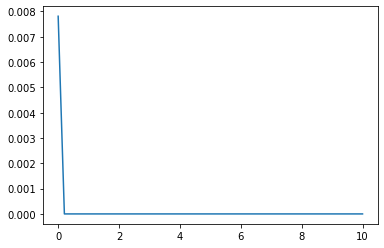

In [44]:
# This is also pretty convincing
import matplotlib.pyplot as plt
import numpy as np
xs = np.linspace(0,10)
plt.plot( xs, babylonian(xs)- np.sqrt(xs))
plt.show()


## * Weakest Precondition



## Sorting Networks

[Sorting networks](https://en.wikipedia.org/wiki/Sorting_network) are a circuit flavored take on sorting. Although you can build circuits for any size input, any paritcular circuit works for a fixed sized input. They are like an unrolling of the loops or recursion of regular style sorting algorithms.


Here's an interesting thing. We can go to Wikipedia and get a little python snippet for the comparison order of a [Batcher even-odd mergesort](https://en.wikipedia.org/w/index.php?title=Batcher_odd%E2%80%93even_mergesort&oldid=969926478) Kind of a confusing algorithm. Why does it even work? Is it even right?

<img src="images/batcher.png" alt="Drawing" style="width: 500px;"/>

In [45]:
# from https://en.wikipedia.org/w/index.php?title=Batcher_odd%E2%80%93even_mergesort&oldid=969926478
def oddeven_merge(lo: int, hi: int, r: int):
    step = r * 2
    if step < hi - lo:
        yield from oddeven_merge(lo, hi, step)
        yield from oddeven_merge(lo + r, hi, step)
        yield from [(i, i + r) for i in range(lo + r, hi - r, step)]
    else:
        yield (lo, lo + r)

def oddeven_merge_sort_range(lo: int, hi: int):
    """ sort the part of x with indices between lo and hi.

    Note: endpoints (lo and hi) are included.
    """
    if (hi - lo) >= 1:
        # if there is more than one element, split the input
        # down the middle and first sort the first and second
        # half, followed by merging them.
        mid = lo + ((hi - lo) // 2)
        yield from oddeven_merge_sort_range(lo, mid)
        yield from oddeven_merge_sort_range(mid + 1, hi)
        yield from oddeven_merge(lo, hi, 1)

def oddeven_merge_sort(length: int):
    """ "length" is the length of the list to be sorted.
    Returns a list of pairs of indices starting with 0 """
    yield from oddeven_merge_sort_range(0, length - 1)

def compare_and_swap(x, a, b) -> None:
    if x[a] > x[b]:
        x[a], x[b] = x[b], x[a]
        
list(oddeven_merge_sort(8)) # compare and swap sequence for 8 items

[(0, 1),
 (2, 3),
 (0, 2),
 (1, 3),
 (1, 2),
 (4, 5),
 (6, 7),
 (4, 6),
 (5, 7),
 (5, 6),
 (0, 4),
 (2, 6),
 (2, 4),
 (1, 5),
 (3, 7),
 (3, 5),
 (1, 2),
 (3, 4),
 (5, 6)]

Well we can confirm this relatively straightforwardly using z3 by replacing the implementation of compare_and_swap with it's z3 equivalent.

In [46]:
def compare_and_swap_z3(x,y):
    x1, y1 = FreshInt(), FreshInt()
    c = If(x <= y, And(x1 == x, y1 == y) , And(x1 == y, y1 == x) )
    return x1, y1, c

It's somewhat interesting to note that the output of odd_even_merge is a sequence of instructions, we can think of this as intepreting a very small 1 instruction (compare_and_swap) programming language.

In [47]:
# predicates of interest
def sorted_list(x): # list is sorted
    return And([x <= y for x,y in zip(x , x[1:])])
def in_list(x,a): # x is in the list of a
    return Or([x == y for y in a])
def sub_list(a, b): # all elements of a appear in b
    return And([in_list(x,a) for x in b ])
def same_elems(a,b): # a contains the same elements as b
    return And(sub_list(a,b), sub_list(b,a))

def verify_network(pairs_to_compare, N):
    s = Solver()

    a = [Int(f"x_{i}") for i in range(N)] #build initial array in z3 variables

    #a_orig = a.copy() # keep around copy for correctness predicate
    for i,j in pairs_to_compare:
       x = a[i]
       y = a[j]
       x1, y1, c = compare_and_swap_z3(x,y) 
       a[i] = x1
       a[j] = y1
       s.add(c)

    #s.add(Not(And(sorted_list(a), same_elems(a_orig,a))))
    s.add(Not(sorted_list(a)))
    if s.check() == unsat:
        print("proved")
        return True
    else:
        return False
N = 8
verify_network(list(oddeven_merge_sort(N)), N)

proved


True

Here's a reasonable sounding question: Can we prove that the Batcher even-odd sort is correct for all possible sizes N? 
Actually, this is very difficult to express in Z3 because here we run into a usage of induction, something Z3 is rather weak at.
In fact such a question is best verified by a tool like Coq, which Cody will talk about tomorrow.

### Synthesis of optimal sorting networks
An optimal sorting network is one that uses the minimal number of compare and swap operations. The batcher even-odd merge sort is good, but perhaps not optimal. What is? We we can find it by enumerating all possible combinations of compare and swaps and the finding one that passes verification as a sorting algorithm. This is an example of program synethesis.

In [ ]:

def all_swaps(m): # all pairs of integers from 0 to m-1
    return [ [(i, j)] for i in range(m) for j in range(i+1, m) ]
    
# All list of length n on swaps on m wires 
def all_networks(m, n): 
   if n == 0:
     return []
   elif n == 1:
     return all_swaps(m)
   else:
     return [ c + swap for c in all_networks(m,n-1) for swap in all_swaps(m)]


def synthesize(N):
    for n in range(N**2): # we can definitely do it in N*2 gates.
       print(f"trying network size: {n}")
       for pairs_to_compare in all_networks(N,n):   
           if verify_network(pairs_to_compare, N):
               return pairs_to_compare


synthesize(4)

The space we are naively looking through is very very large. Consider what else might you want to do to speed things up. Early pruning of bad networks with testing, avoiding ever looking at obviously bad networks, maybe the completely optimal sorting network isn't necessary for you. Maybe a randomized search might be faster. 

## Verifying a neural network

Neural networks are all the rage these days. One way of looking at neural networks is that they are a flexibly parametrized class of functions. What makes them useful is: 

1. They can be used at insane scale due to their simplicity and excellent available implementations.
2. There are intuitive ways to input abstract structure and symmetry expected of a problem, for example translation symmetry, or a hierarchy of small scale pattern recognition combining into large scale strutures
3. Inspirational analogies can be drawn from nature.

Neural networks made out of just relus (rectified linear units, relu(x) = max(0,x) ) and linear layers are particularly amenable to formal analysis. Regarding the weights as fixed, a neural network is a piecewise linear function and piecewise linear functions are among the functions most amenable to rigoruous anaysis.

Most machine learning tasks don't have a mathematically precise specification. What is the mathematically precise definition of a picture of a horse? We could try to come up with something, but it would be rather suspect. 

The surprising power of neural networks has often been in areas where a mathematically precise rule based specification has not worked. Tasks that DO have a spec are questionable areas for machine learning techniques, because how can you know that the network meets the spec? Also, one would suspect such a problem would have exploitable structure such that you might be better off with a less general purpose approach. 

However, there a a couple areas where one does have reasonable formal questions one might want to ask about a neural network:
- Robustness around training examples and valdiation examples. Adversarial examples.
- Control Systems - There are many control systems which we do have a reasonable formal spec one could write such as walking robots. These systems are so high dimensional that it is difficult to derive a good controller from the spec, and hence reinforcement learning may be a reasonable option
- Neural networks as computational accelerators. There are problems which we know how to solve, but are very slow. It may be useful to presolve a large number of examples offline and train a neural network to give good estimates. Neural networks can be evaluated very quickly and easily thanks to modern frameworks.
- Dead neuron pruning. Can we show that some neuron never fires over the domain of interest?
  

Here we'll train a network to fit a simple 1-D function and then verify it's accuracy. This is of course a complete toy. How often do you see 1-D input space neural networks? Not often I bet.

But it's nice for a couple reasons:
1. Because we can visualize it. 
2. It drives home the point about neural nets being a space of piecewise linear function approximators, and how similar training is to curve fitting.
3. It's simple enough that z3 can crush it. There is a big question if z3 or other formal methods can scale to modern neural nets. Modern top of the line neural nets are insanely huge. There are special purpose SMT solvers being built for this task. There are other approaches being pursued such as the use of mixed integer programming solvers. So this is an area of research. Come see tomorrow's talk for more!


The combination of the capabilities of sympy and z3 give us access to some very intriguing possibilities. We're not going to investigate this in detail, but we are showing how you can convert a sympy derived polynomial into a python expression using `lambdify`, which can then be in turn used on z3 variables.
Here we're picking a chebyshev polynomial as our base truth because chebyshev polynomials have some pleasant waviness to them

For more on neural verification, I would check out
- https://sat-smt.in/programme.html  A 3 Part tutorial at SAT+SMT school by Guy Katz
- https://github.com/sisl/NeuralVerification.jl

In [ ]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
x = sy.symbols('x')
cheb = sy.lambdify(x, sy.chebyshevt(4,x))
xs = np.linspace(-1,1,1000)
ys = cheb(xs)
plt.plot(xs, ys)
plt.show()

In [ ]:
plt.plot(xs, np.maximum(0,xs))
plt.title("relu")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=[1]),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

model.fit(xs, ys, epochs=100, verbose=0)
plt.plot(xs,model.predict(xs))
plt.show()

In [ ]:
w1, b1, w2, b2, w3, b3 = model.get_weights() # unpack weights from model

def Relu(x):
    return np.vectorize(lambda y: If(y >= 0 , y, RealVal(0)))(x)

# reinterpet network symbolically using z3 variables.
def net(x):
    x1 = w1.T @ x + b1
    y1 = Relu(x1)
    x2 = w2.T @ y1 + b2
    y2 = Relu(x2)
    x3 = w3.T @ y2 + b3
    return x3

x = np.array([Real('x')])
y_true = cheb(x)
y_pred = net(x)
s = Solver()
s.add(-1 <= x[0], x[0] <= 1) # constraint input to [-1,1] interval

def Abs(x):
    return If(x <= 0, -x, x)
s.add(Abs( y_pred[0] - y_true[0] ) >= 0.5) # Is there an input with absolute error greater than 0.5?

res = s.check()
print(res)
if res == sat:
    m = s.model()
    print("Bad x value:", m[x[0]])
    x_bad = m[x[0]].numerator_as_long() / m[x[0]].denominator_as_long() 
    print("Error of prediction: ", abs(model.predict(np.array([x_bad])) - cheb(x_bad)))

# Takeaways

- Z3 is fun.
- Z3 is a powerful solver.
- It can find satisfy contraints and solve puzzles
- Exhaustively failing to find counterexamples = Proof
- Mathematics
- Translating programs to Z3

Z3 is not a panacea. It has some weaknesses in particular in regards to abstraction and induction. Nevertheless, working to Z3's strengths and making small compromises you can do astounding things with minimal effort.

# Thanks for Coming!

## References

- rise4fun https://rise4fun.com/z3/tutorialcontent/guide
- https://ericpony.github.io/z3py-tutorial/guide-examples.htm
- Programming Z3 - https://theory.stanford.edu/~nikolaj/programmingz3.html
- Nikolaj Bjorner's tutorial https://youtu.be/nGwyNmsxX6I
- Hakank's examples http://www.hakank.org/z3/
- Yurichev's book "SMT by Example" https://yurichev.com/writings/SAT_SMT_by_example.pdf
- http://hackage.haskell.org/package/sbv
- https://www.youtube.com/watch?v=ruNFcH-KibY Tikhon Jelvis - Analyzing Programs with Z3
- https://www.youtube.com/watch?v=rvPWDgJc0O4&ab_channel=ACMSIGPLAN - Nadia Polykarpova on Z3
- SAT SMT school https://sat-smt.in/
- Emina Torlak's course https://courses.cs.washington.edu/courses/cse507/19au/calendar.html
- Lindsey Kuper - SMT Solving and Solver-Aided Systems http://composition.al/CSE290Q-2019-09/
- http://www.sc-square.org/CSA/school/lectures.html